# 이 노트북은 `Rumor-has-it` 중 3 개의 Dataset (airfrance.txt, michelle.txt, and palin.txt)를 가져와 작업한다.

In [1]:
import pandas as pd
import numpy as np
from glob2 import glob
import json

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re
from nltk.corpus import stopwords as stp
from nltk.stem.porter import PorterStemmer

import gensim
import gensim.models.word2vec as w2v
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from datetime import datetime
from datetime import date
from datetime import timedelta

[nltk_data] Downloading package punkt to /Users/june/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/june/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [31]:
!ls ../rumor_has_it/data/

README.md     cell-ids.txt  obama-ids.txt
airfrance.txt michelle.txt  palin.txt


In [92]:
airfrance = pd.read_csv("../rumor_has_it/data/airfrance.txt",sep='\t',names=['time', 'id', 'text','isRumor'])
michelle = pd.read_csv("../rumor_has_it/data/michelle.txt",sep='\t',names=['time', 'id', 'text','isRumor'])
palin = pd.read_csv("../rumor_has_it/data/palin.txt",sep='\t',names=['time', 'id', 'text','isRumor'])
# obama = pd.read_csv("../rumor_has_it/data/obama-ids.txt",sep='\t',names=['time', 'id', 'text','isRumor'])
# cell = pd.read_csv("../rumor_has_it/data/cell-ids.txt",sep='\t',names=['time', 'id', 'text','isRumor'])

In [96]:
dataset = pd.concat([airfrance, michelle, palin])

<AxesSubplot:xlabel='isRumor'>

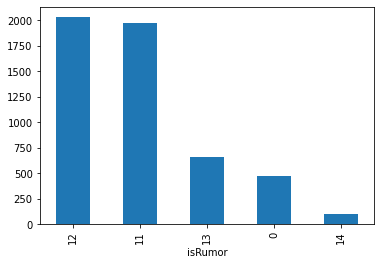

In [107]:
dataset.value_counts('isRumor').plot(kind='bar')

In [91]:
print(dataset['isRumor'].loc[dataset['isRumor'] == '12'] = 0)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-91-bf87a7bef1df>, line 1)

In [98]:
mask = dataset.isRumor == ('12' or '11')
dataset.loc[mask, 'isRumor']

dataset.loc[dataset.isRumor > 20000, 'my_channel'] = 0

# dataset.loc[dataset['isRumor']=='12']

Series([], Name: isRumor, dtype: int64)

In [103]:
dataset.loc[dataset.isRumor > 0, 'isRumor']

0       12
2       12
3       12
4       12
5       11
        ..
4413    11
4415    11
4417    14
4419    11
4421    11
Name: isRumor, Length: 4752, dtype: int64